In [ ]:
# Import necessary libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


In [ ]:
# Load data
df = pd.read_csv('Loan_Default.csv')
# Preview the first five records
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552.0,EXP,55-64,to_inst,NaN,North,direct,1.0,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.0


In [ ]:
# Get the variables
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
df['Status']

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
10971    1.0
10972    0.0
10973    1.0
10974    0.0
10975    NaN
Name: Status, Length: 10976, dtype: float64

In [ ]:
# Get more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10976 entries, 0 to 10975
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10976 non-null  int64  
 1   year                       10976 non-null  int64  
 2   loan_limit                 10722 non-null  object 
 3   Gender                     10976 non-null  object 
 4   approv_in_adv              10908 non-null  object 
 5   loan_type                  10975 non-null  object 
 6   loan_purpose               10968 non-null  object 
 7   Credit_Worthiness          10975 non-null  object 
 8   open_credit                10975 non-null  object 
 9   business_or_commercial     10975 non-null  object 
 10  loan_amount                10975 non-null  float64
 11  rate_of_interest           8291 non-null   float64
 12  Interest_rate_spread       8276 non-null   float64
 13  Upfront_charges            8063 non-null   flo

In [ ]:
# Check for missing values
df.isnull().sum()

ID                              0
year                            0
loan_limit                    254
Gender                          0
approv_in_adv                  68
loan_type                       1
loan_purpose                    8
Credit_Worthiness               1
open_credit                     1
business_or_commercial          1
loan_amount                     1
rate_of_interest             2685
Interest_rate_spread         2700
Upfront_charges              2913
term                            6
Neg_ammortization               9
interest_only                   1
lump_sum_payment                1
property_value               1152
construction_type               1
occupancy_type                  1
Secured_by                      1
total_units                     1
income                        657
credit_type                     1
Credit_Score                    1
co-applicant_credit_type        1
age                            16
submission_of_application      16
LTV           

In [ ]:
# Filling missing values in numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Filling missing values in categorical columns with the most frequent value
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Check whether the missing values have been handled
df.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [ ]:
# Convert 'Status' column from float to int
df['Status'] = df['Status'].astype(int)

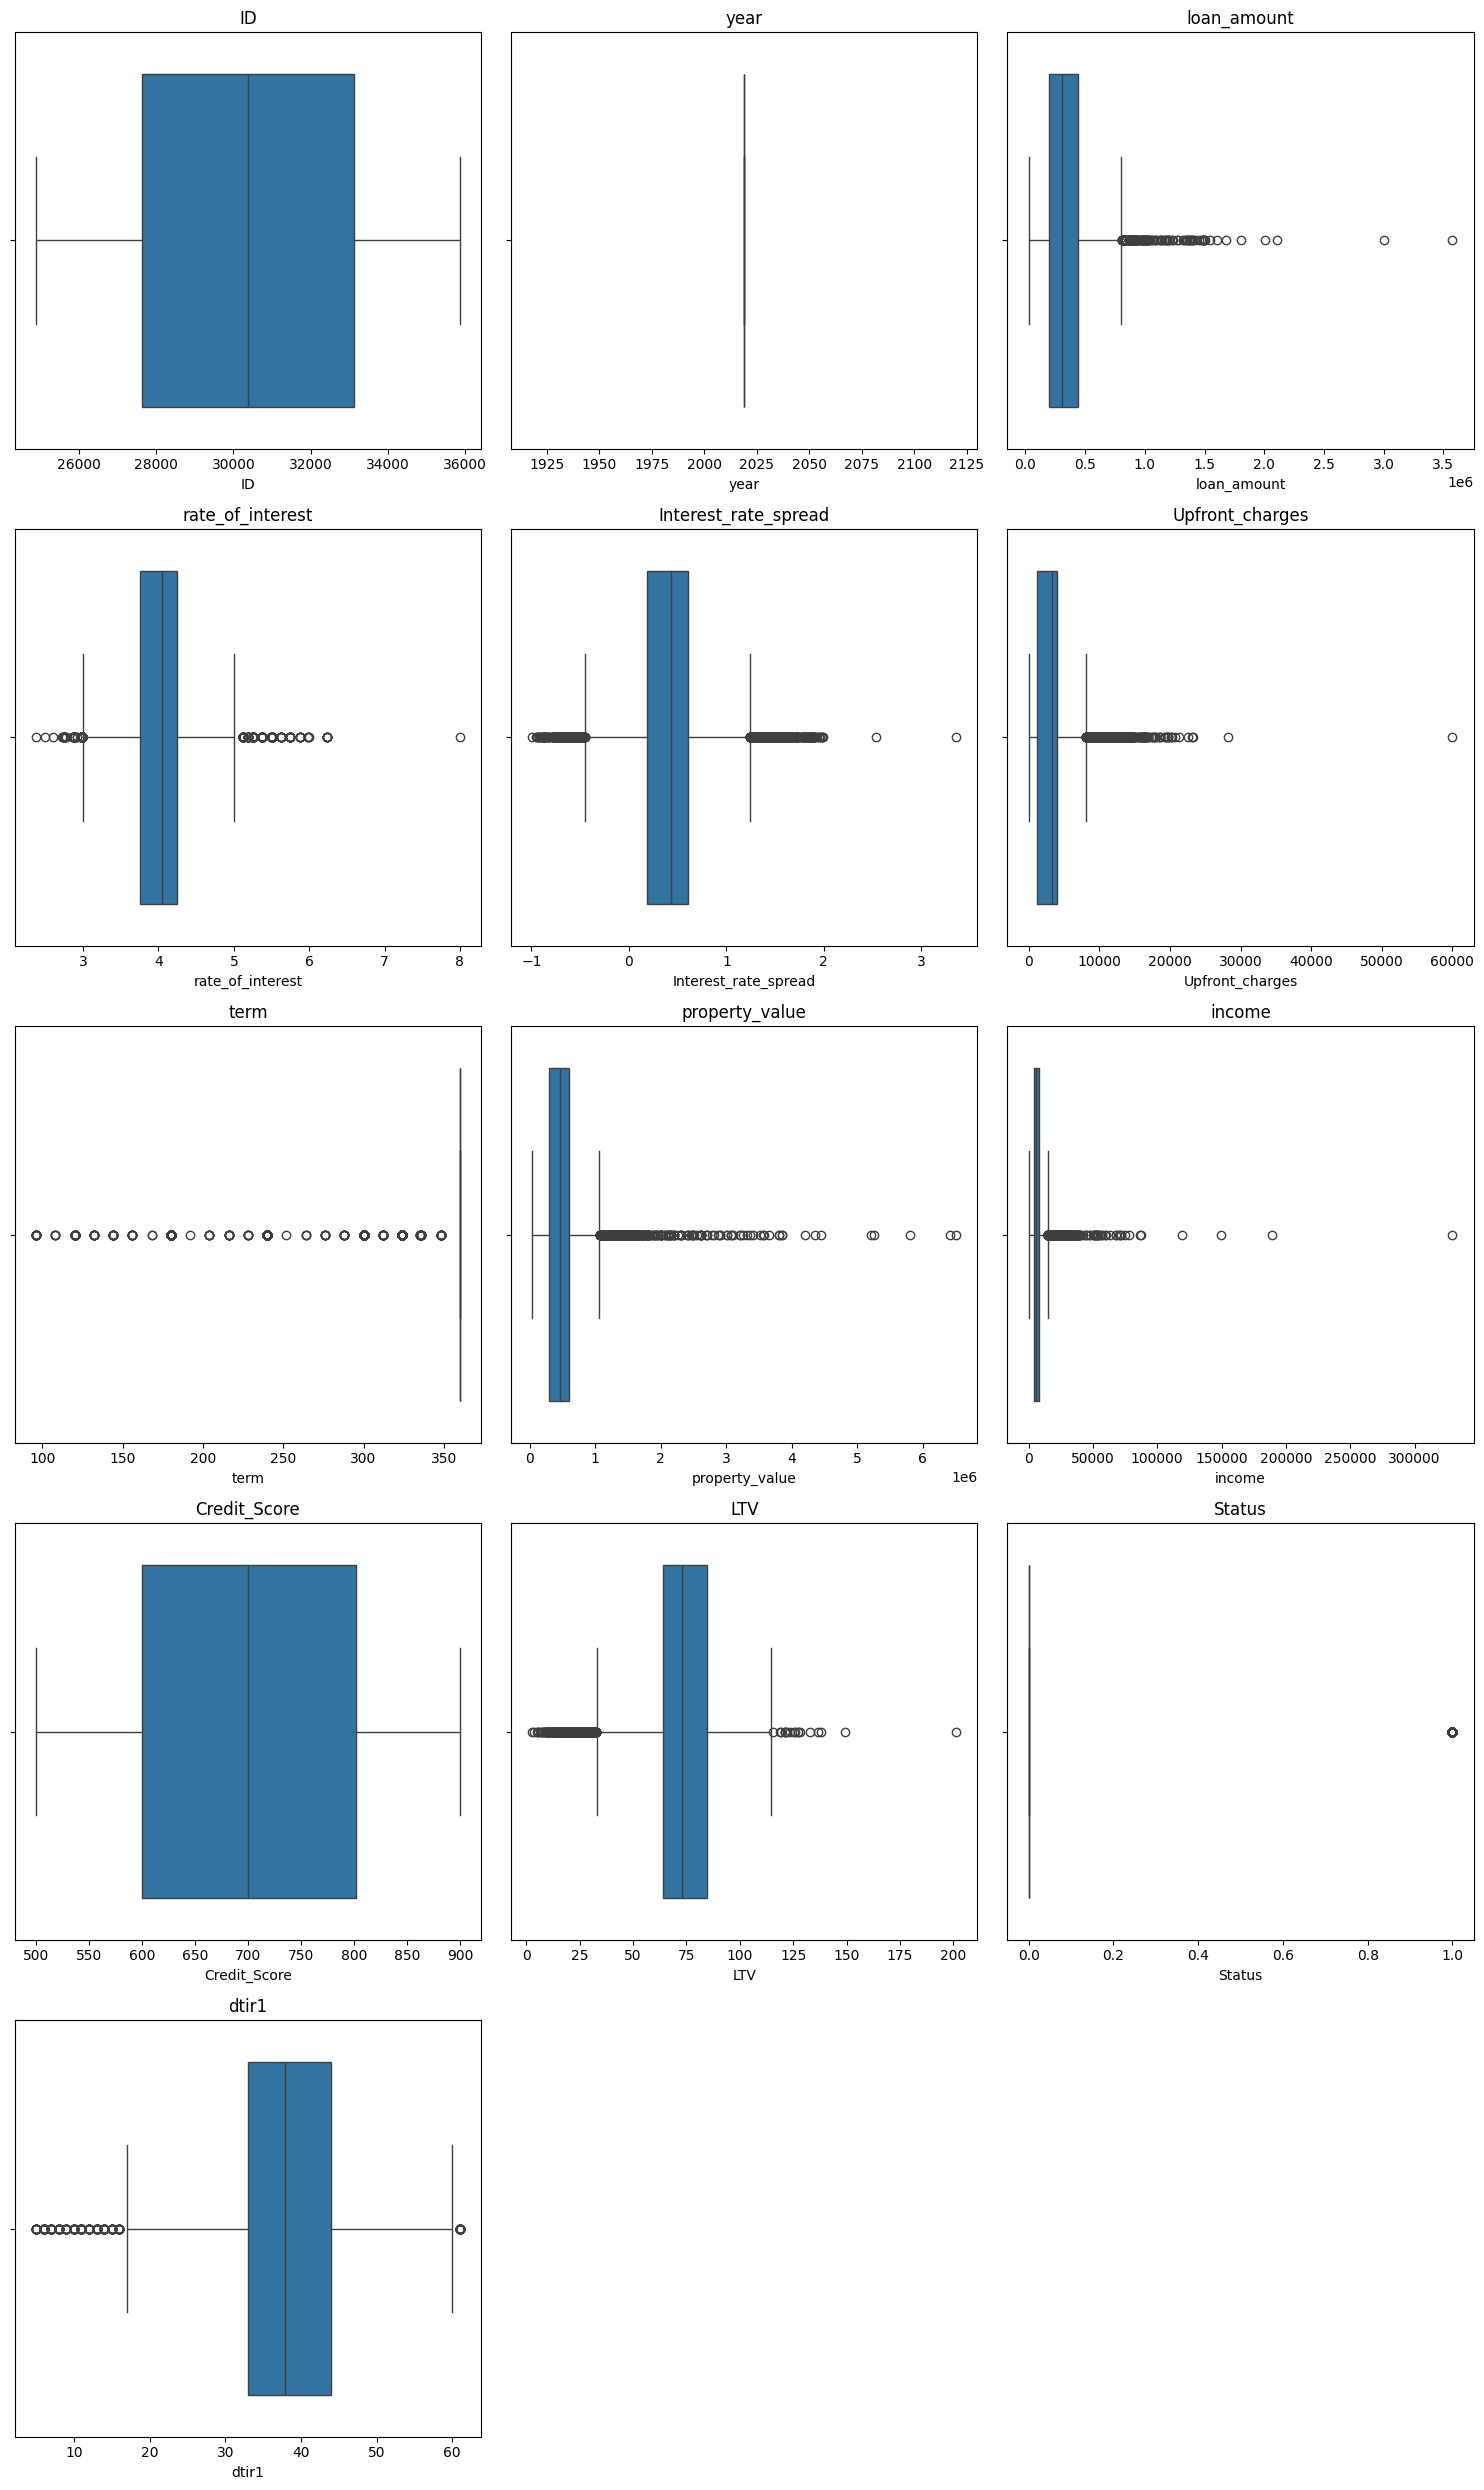

In [ ]:
# Check for outliers in numerical columns
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

There are a number of outliers in columns dtr1, LTV and property value but they will not be dropped because they are necessary for analysis

In [ ]:
# Descriptive statistics
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,10976.000000,10976.0,1.097600e+04,10976.000000,10976.000000,10976.000000,10976.000000,1.097600e+04,10976.000000,10976.000000,10976.000000,10976.000000,10976.000000
mean,30377.500000,2019.0,3.344991e+05,4.042818,0.435742,3263.016068,335.223336,5.000725e+05,7003.510030,700.712984,72.755868,0.245900,37.856069
std,3168.642612,0.0,1.875121e+05,0.483576,0.445005,2792.402224,58.384638,3.462380e+05,6548.806065,115.571270,17.590902,0.430639,9.547784
min,24890.000000,2019.0,2.650000e+04,2.375000,-0.990800,0.000000,96.000000,3.800000e+04,0.000000,500.000000,2.813745,0.000000,5.000000
25%,27633.750000,2019.0,1.965000e+05,3.750000,0.180875,1250.000000,360.000000,2.880000e+05,3840.000000,600.000000,63.888889,0.000000,33.000000
50%,30377.500000,2019.0,3.065000e+05,4.042818,0.435742,3263.016068,360.000000,4.680000e+05,6060.000000,700.000000,73.063487,0.000000,37.856069
75%,33121.250000,2019.0,4.365000e+05,4.250000,0.603750,3985.202500,360.000000,5.980000e+05,8280.000000,802.000000,84.564394,0.000000,44.000000
max,35865.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,6.508000e+06,329460.000000,900.000000,201.315789,1.000000,61.000000


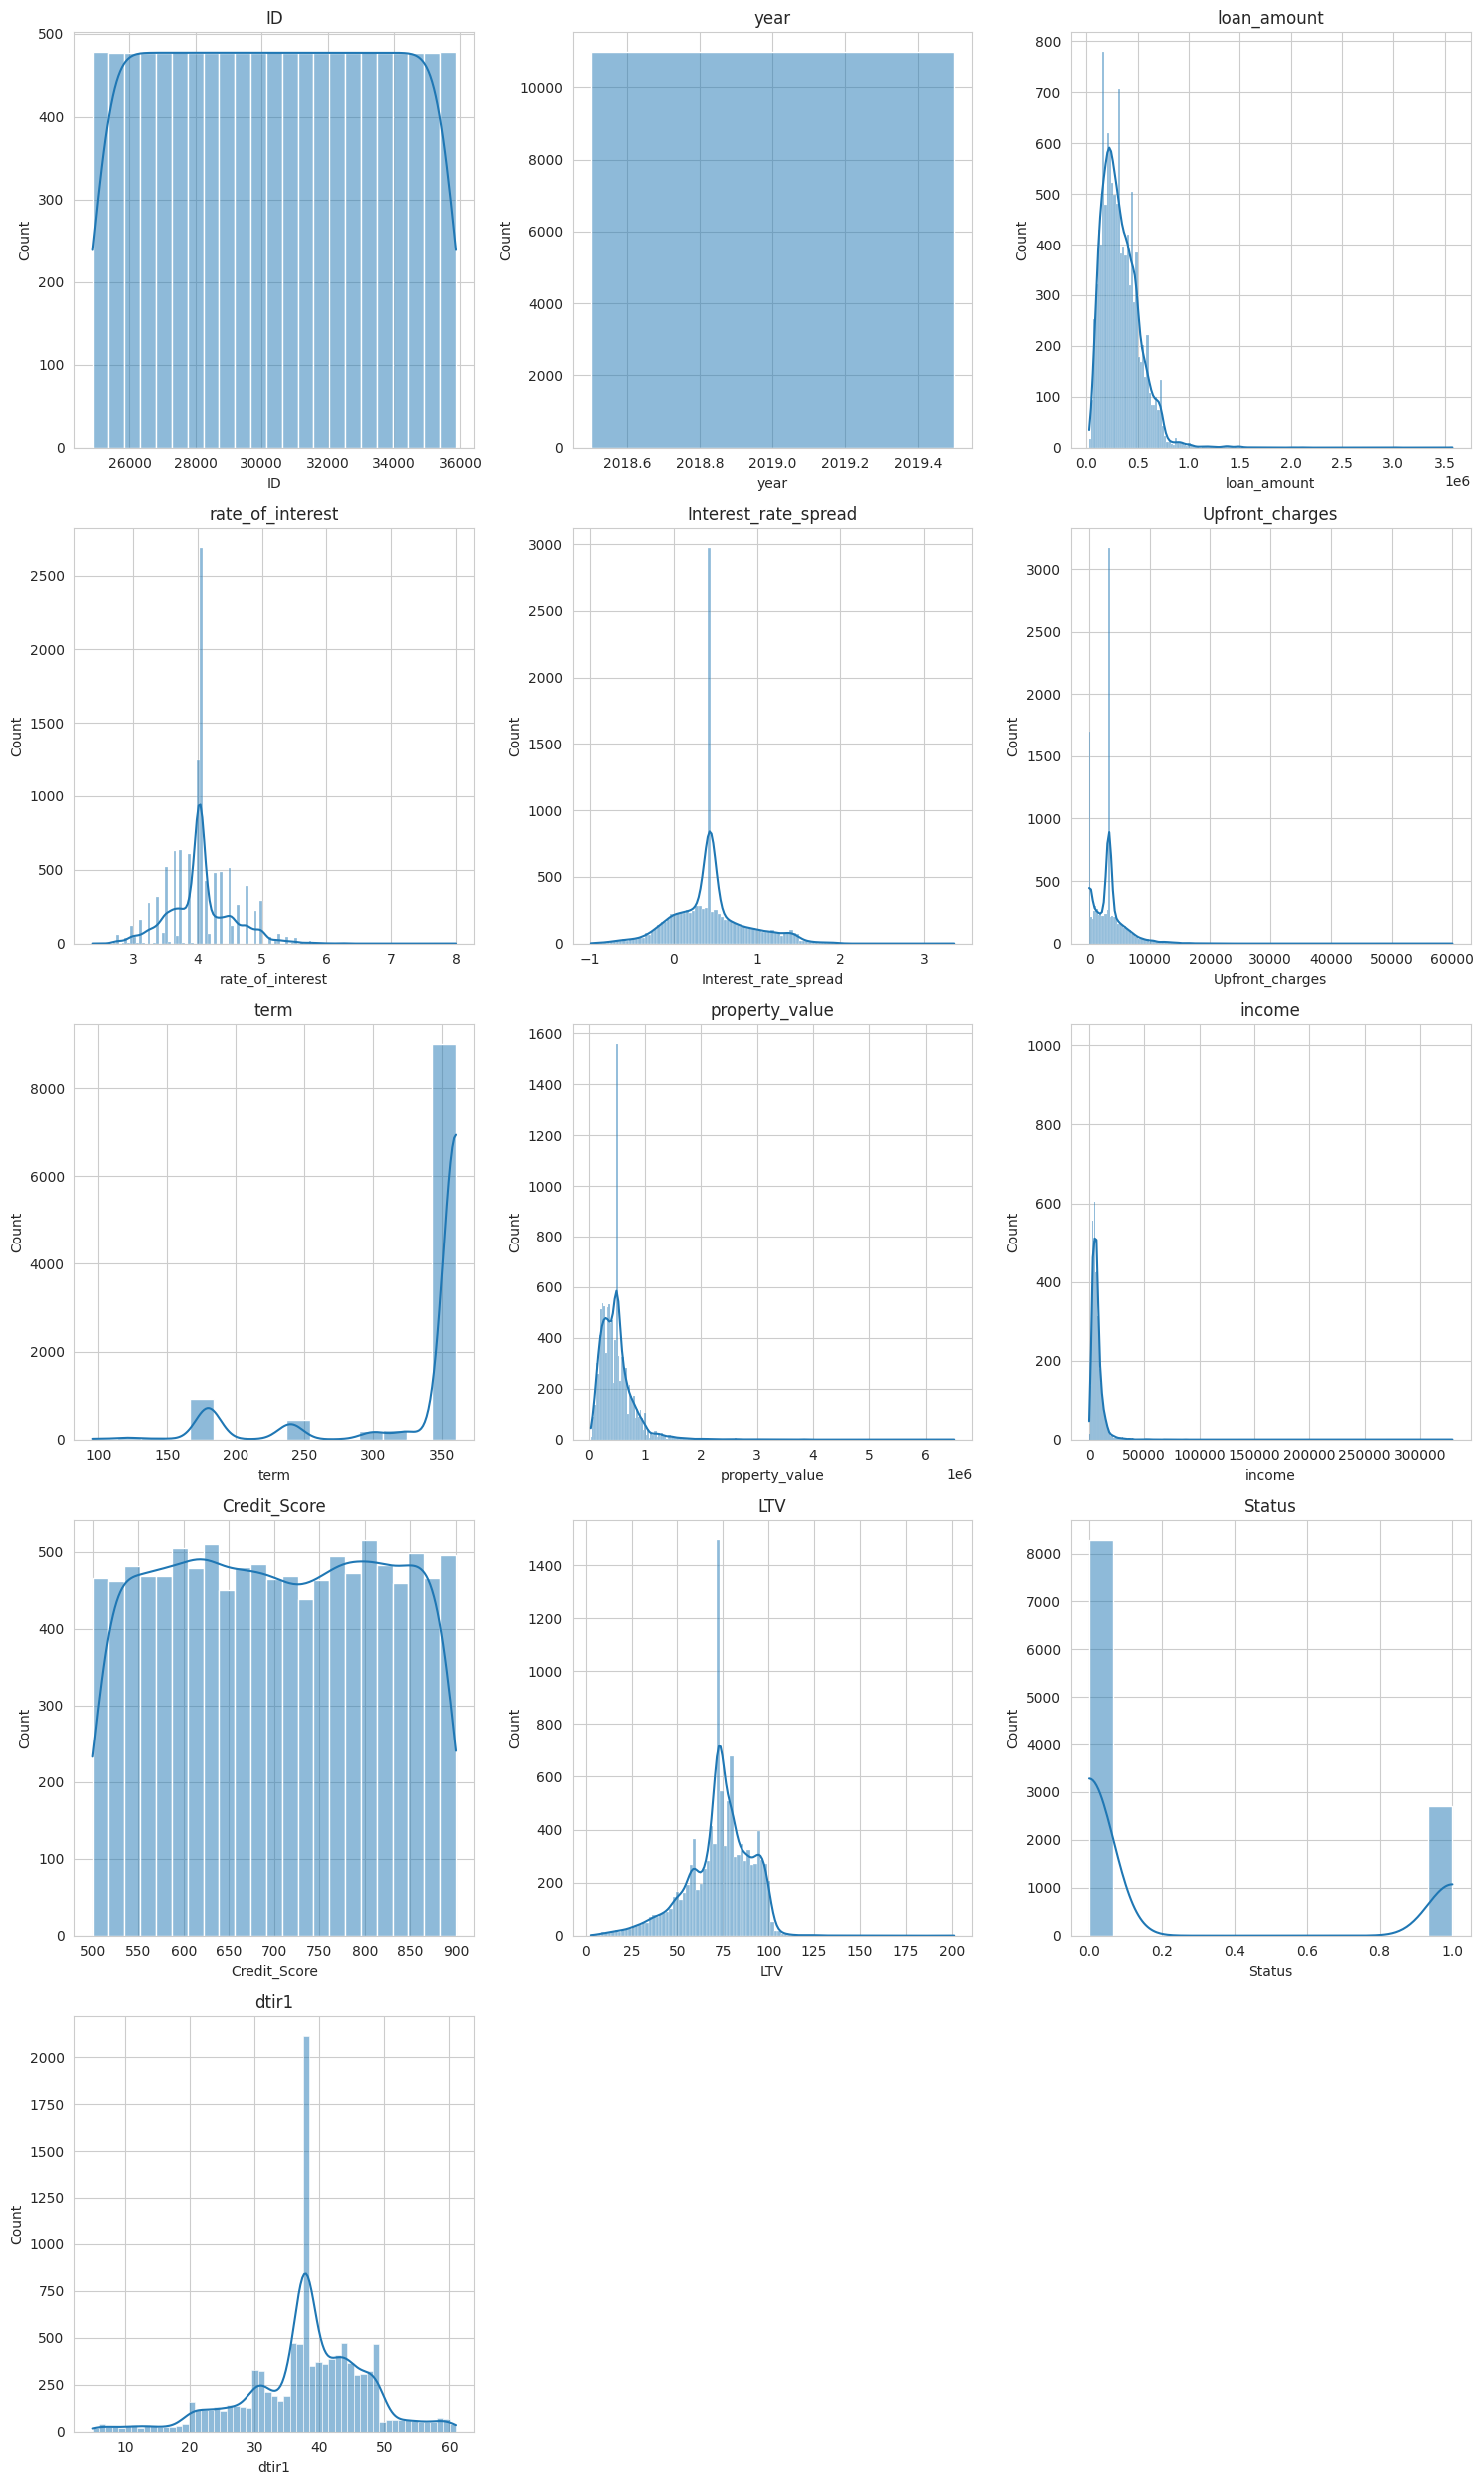

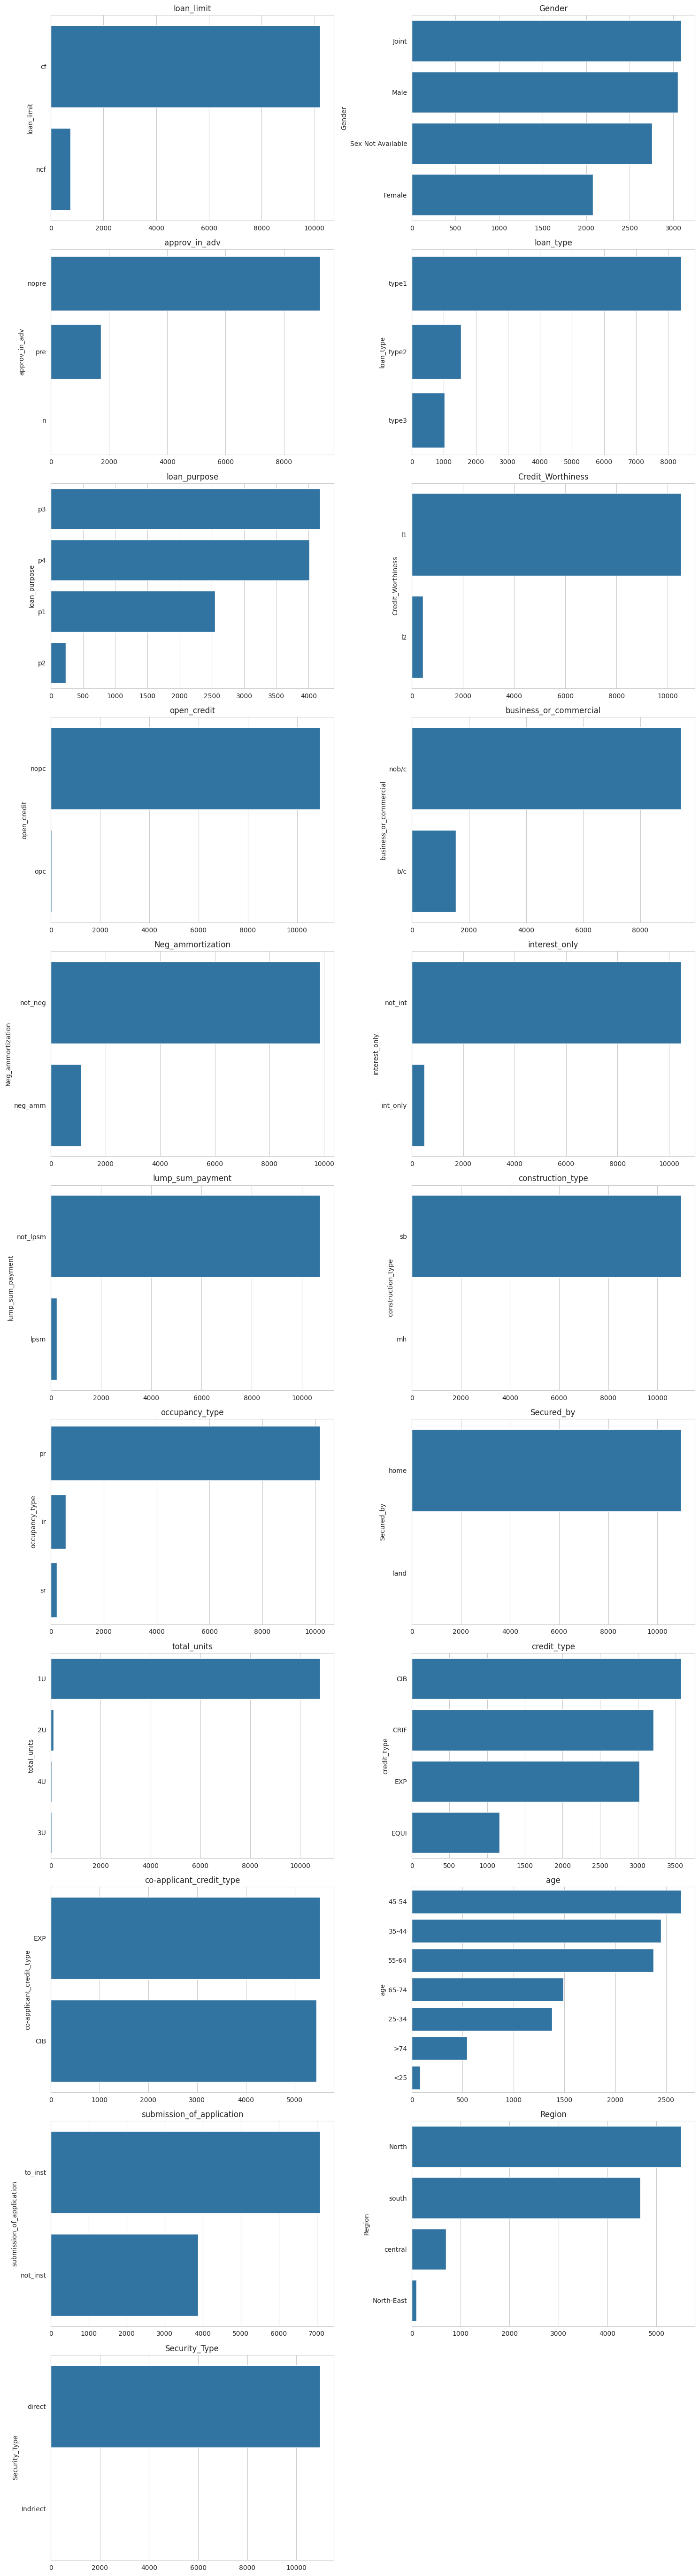

In [ ]:
# Set the style of seaborn
sns.set_style("whitegrid")


plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

# Visualizing distributions of categorical data

# Check for counts of categorical columns
num_cols = len(categorical_columns)
num_rows = (num_cols // 2) + (num_cols % 2 > 0)  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

Count function was used to show distribution in categorical variables while histograms were usd to show numerical distribution

# Model Development

In [ ]:
# Splitting data into features and target variable
X = df.drop(columns=['Status'])  # Features
y = df['Status']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Preprocessing categorical features
categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough')

X_train_preprocessed = categorical_transformer.fit_transform(X_train)
X_test_preprocessed = categorical_transformer.transform(X_test)

# Training the logistic regression model
logistic_regression_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_regression_model.fit(X_train_preprocessed, y_train)

# Making predictions
y_pred = logistic_regression_model.predict(X_test_preprocessed)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7527322404371585
